
#Cover Page

**Developed by:**

**Fatma Mohamed Ali - 41810121**

In [372]:
!gdown --id 1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8

Downloading...
From: https://drive.google.com/uc?id=1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 8.44MB/s]


#Description of data:

**The  datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, refer to [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)**

**These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**

#Content
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)


#Import the dataset from drive

#Importing libraries

In [373]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn import metrics


# show how the data looks like

In [374]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [375]:
df['quality label'] = df['quality'].apply(lambda x: 1 if x<=5 else 2 if x<=7 else 3)
print(df[['quality','quality label']].value_counts().sort_index())
df.head()

quality  quality label
3        1                  20
4        1                 163
5        1                1457
6        2                2198
7        2                 880
8        3                 175
9        3                   5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


# Check if all data are numbers and if there is a relations between the data


In [376]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality label         4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [377]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality label'],
      dtype='object')

In [378]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()

#Heatmap

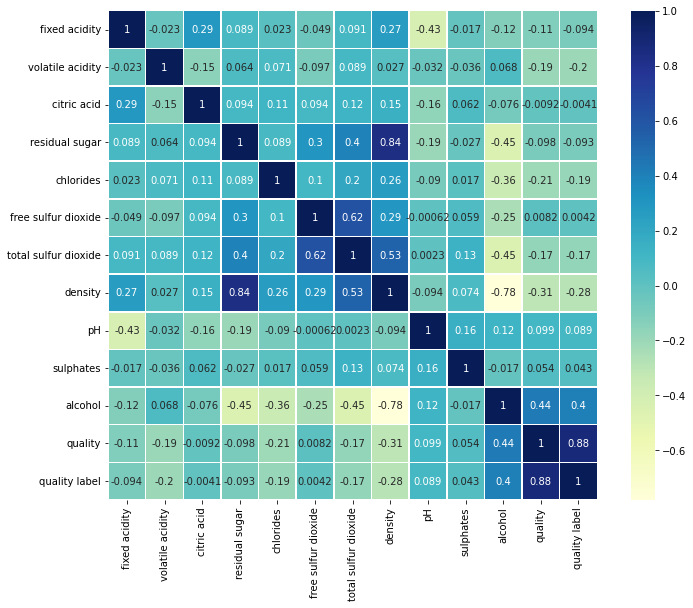

In [379]:
#df.corr()
x,y = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),cmap='YlGnBu',square=True,linewidth=.5,annot=True)
plt.show()

# Check for the null 

In [380]:
#df.isna().any()
df.isnull().sum()
#df.dropna()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality label           0
dtype: int64

# show mean, max , min so handle the data if there is a gap between 75% and max  


In [381]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.701919
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.531776
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,1.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,2.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,2.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,3.000000


# check for the outlier

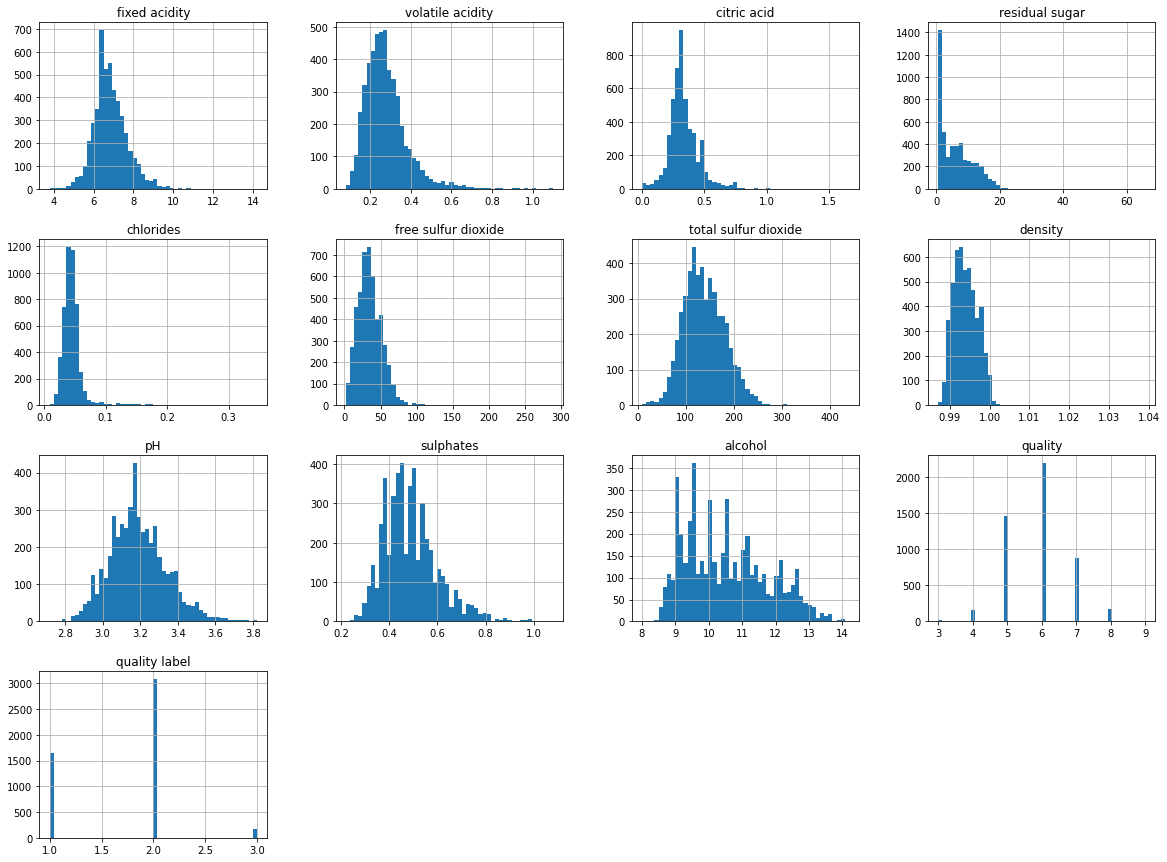

In [382]:
"""
df['Area'].skew()
df['Asymmetry.Coeff'].skew()
plt.boxplot(df['Kernel.Groove'])
plt.show()
"""
df.hist(bins=50,figsize=(20,15))
plt.show()

In [383]:
df.shape

(4898, 13)

In [384]:
"""
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)
df = df[~((df < (Q1 - 1.5 *  IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print (df.shape)
"""

'\nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\nprint (IQR)\ndf = df[~((df < (Q1 - 1.5 *  IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]\nprint (df.shape)\n'

In [385]:
print(df.skew())

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
quality label          -0.124883
dtype: float64


In [386]:
# plt.boxplot(dataset)      
# plt.show()

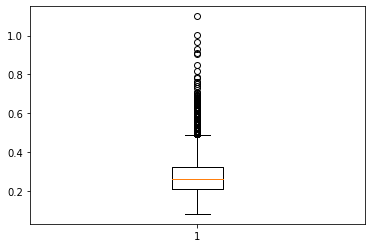

In [387]:
plt.boxplot(df['volatile acidity'])      
plt.show()

In [388]:
print((df).quantile(0.10))
print((df).quantile(0.90))

fixed acidity            5.900000
volatile acidity         0.170000
citric acid              0.220000
residual sugar           1.200000
chlorides                0.030000
free sulfur dioxide     15.000000
total sulfur dioxide    87.000000
density                  0.990327
pH                       3.000000
sulphates                0.360000
alcohol                  9.000000
quality                  5.000000
quality label            1.000000
Name: 0.1, dtype: float64
fixed acidity             7.90000
volatile acidity          0.40000
citric acid               0.49000
residual sugar           14.00000
chlorides                 0.05800
free sulfur dioxide      57.00000
total sulfur dioxide    195.00000
density                   0.99815
pH                        3.38000
sulphates                 0.64000
alcohol                  12.40000
quality                   7.00000
quality label             2.00000
Name: 0.9, dtype: float64


In [389]:
# print(df['volatile acidity'].skew())
# df["volatile acidity"]=np.where(df["volatile acidity"]< 0.170000, 0.170000,df["volatile acidity"])
# df["volatile acidity"]=np.where(df["volatile acidity"]> 0.40000,0.40000,df["volatile acidity"])
# print(df['volatile acidity'].skew())

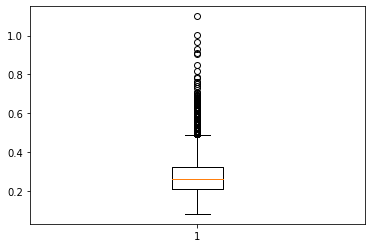

In [390]:
plt.boxplot(df['volatile acidity'])      
plt.show()

In [391]:
print(df['citric acid'].skew())
df['citric acid']=np.where(df['citric acid']<  0.220000, 0.220000,df['citric acid'])
df['citric acid']=np.where(df['citric acid']> 0.490000,0.49000,df['citric acid'])
print(df['citric acid'].skew())

1.2819203981671066
0.5475219822665509


In [392]:
print(df['residual sugar'].skew())
df['residual sugar']=np.where(df['residual sugar']< 1.200000, 1.200000,df['residual sugar'])
df['residual sugar']=np.where(df['residual sugar']> 14.00000,14.00000,df['residual sugar'])
print(df['residual sugar'].skew())

1.0770937564240868
0.4799661901317822


In [393]:
print(df['free sulfur dioxide'].skew())
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']< 15.000000, 15.000000,df['free sulfur dioxide'])
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']>  57.00000, 57.00000,df['free sulfur dioxide'])
print(df['free sulfur dioxide'].skew())

1.4067449205303078
0.1846825000849415


In [394]:
print(df['chlorides'].skew())
df['chlorides']=np.where(df['chlorides']< 1.200000, 1.200000,df['chlorides'])
df['chlorides']=np.where(df['chlorides']> 14.00000,14.00000,df['chlorides'])
print(df['chlorides'].skew())

5.023330682759707
0


In [395]:
print(df.skew())

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             0.547522
residual sugar          0.479966
chlorides               0.000000
free sulfur dioxide     0.184683
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
quality label          -0.124883
dtype: float64


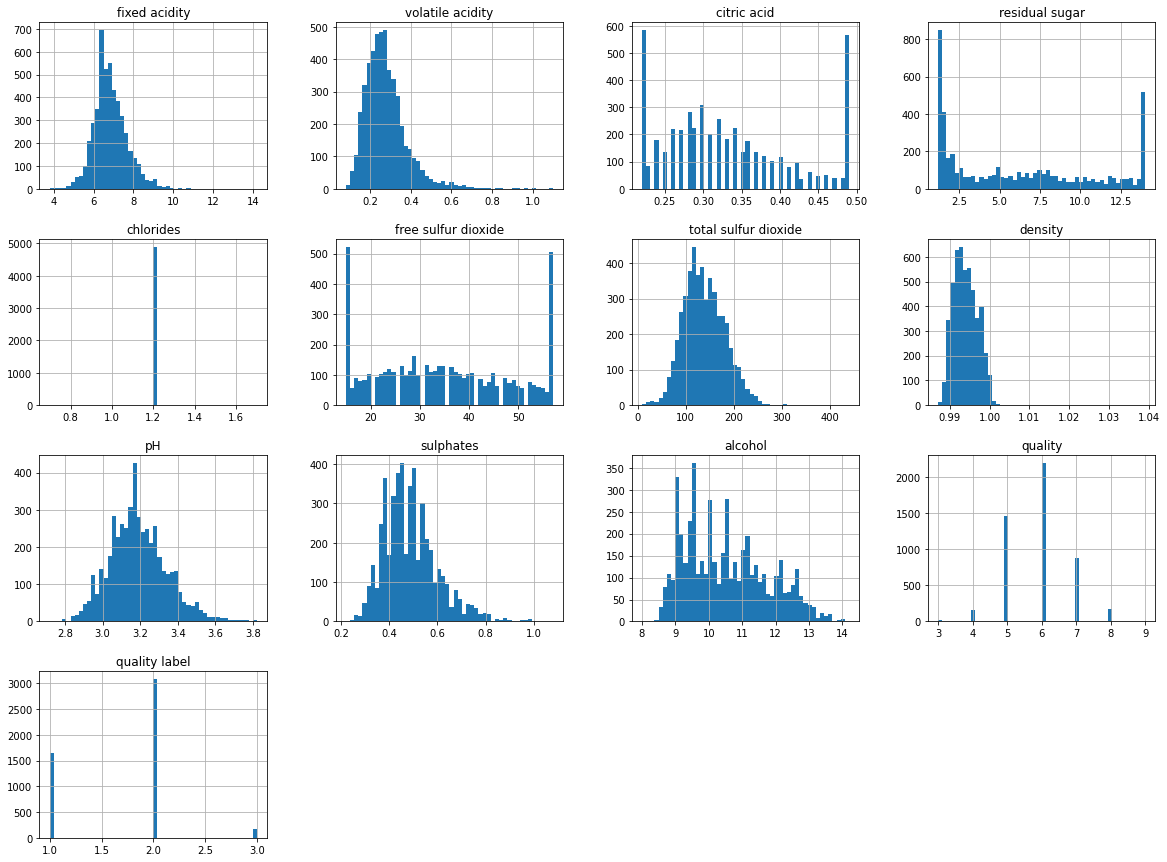

In [396]:
df.hist(bins=50,figsize=(20,15))
plt.show()

#Start Split the data and train

In [398]:
df_target = df["quality"]  #save target for training set
df = df.drop("quality", axis=1) #drop target for training set

#Normalization

In [399]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality label
0,0.172097,-0.081770,0.333101,1.737165,2.220446e-16,0.759786,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.560596
1,-0.657501,0.215896,0.097195,-1.011478,2.220446e-16,-1.450353,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.560596
2,1.475751,0.017452,0.804913,0.163345,2.220446e-16,-0.345284,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.560596
3,0.409125,-0.478657,-0.138712,0.518009,2.220446e-16,0.907129,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.560596
4,0.409125,-0.478657,-0.138712,0.518009,2.220446e-16,0.907129,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.560596


**train_test_split imported from sklearn.model_selection**

In [400]:
"""
#split the data for training and validation
First Way to split data 
train_set_size= int(len (df) * 0.7)
train_set = df [:train_set_size][:]
valid_set = df [train_set_size:][:]

train_target = df_target [:train_set_size]
valid_target = df_target [train_set_size:]
print(len (train_set), "train +", len(valid_set), "valid")
"""
#second way
#train_set, valid_set = train_test_split(df, test_size=0.2)
#train_target, valid_target = train_test_split (df_target, test_size=0.2)


# print(df.shape)
# print(df_target.shape)

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size = 0.20, random_state=22, stratify=df['quality label'])
print(len(X_train), "train +", len(X_test), "valid")

(4898, 12)
(4898,)
3918 train + 980 valid


#Using **SVM** model for trainning

**Kernel = poly can be kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’**


In [401]:
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # poly

**Train the model using the training sets**


In [402]:
clf.fit(X_train, y_train)

SVC(kernel='poly')

**Predict the response for test dataset**

In [403]:
y_pred = clf.predict(X_test)

**Import scikit-learn metrics module for accuracy calculation**

**Model Accuracy: how often is the classifier correct?**

In [404]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7928571428571428


#find the mean square error

**mean_squared_error imported from from sklearn.metrics**

**np.sqrt imported from numpy** 

In [405]:

#lin_mse = mean_squared_error(Y_valid, y_pred)
#lin_rmse = np.sqrt(lin_mse)
#lin_rmse

**mean_absolute_error imported from from sklearn.metrics**


In [406]:
#lin_mae = mean_absolute_error(Y_valid, y_pred)
#lin_mae